In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('EV_dataset001.csv')

df.Outcome.unique()
df.Outcome.value_counts()
df.head(20)

,model,Outcome,Sales,Range,Cost,Time,Monthly,Affordability
0,tesla 3,1,211641,272,43490,6,627,5
1,rivian RT1,0,20332,230,75000,10,1287,4
2,lucid pure,0,34000,410,87400,20,1485,4
3,polstar 2,1,51500,270,48400,2,700,5
4,kia EV6,1,80000,310,48400,20,827,5
5,nissan leaf,1,12000,145,27800,36,505,6
6,porsche taycan,1,34801,246,86700,72,1473,4
7,hyundai ioniq 5,1,23000,220,41500,40,805,5
8,bmw i4,1,10000,256,51500,16,913,5
9,audi etron,1,7503,225,72000,72,847,5


<AxesSubplot:>

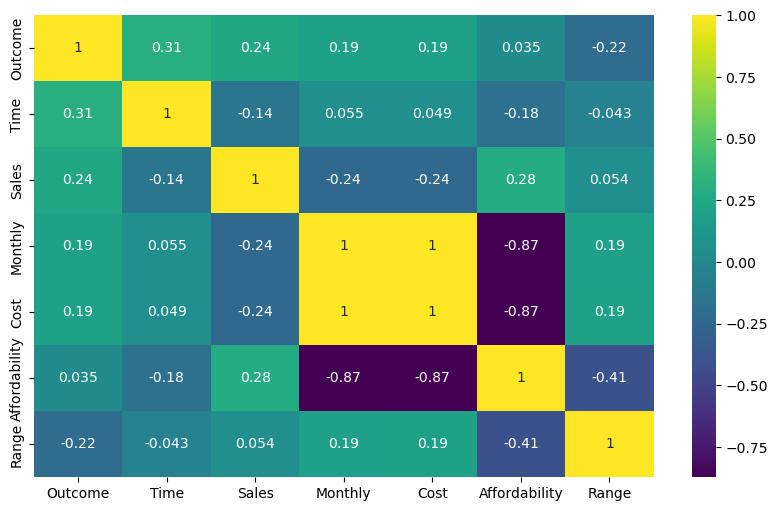

In [3]:
k = 9
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

array([[<AxesSubplot:title={'center':'Outcome'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Range'}>],
       [<AxesSubplot:title={'center':'Cost'}>,
        <AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Monthly'}>],
       [<AxesSubplot:title={'center':'Affordability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

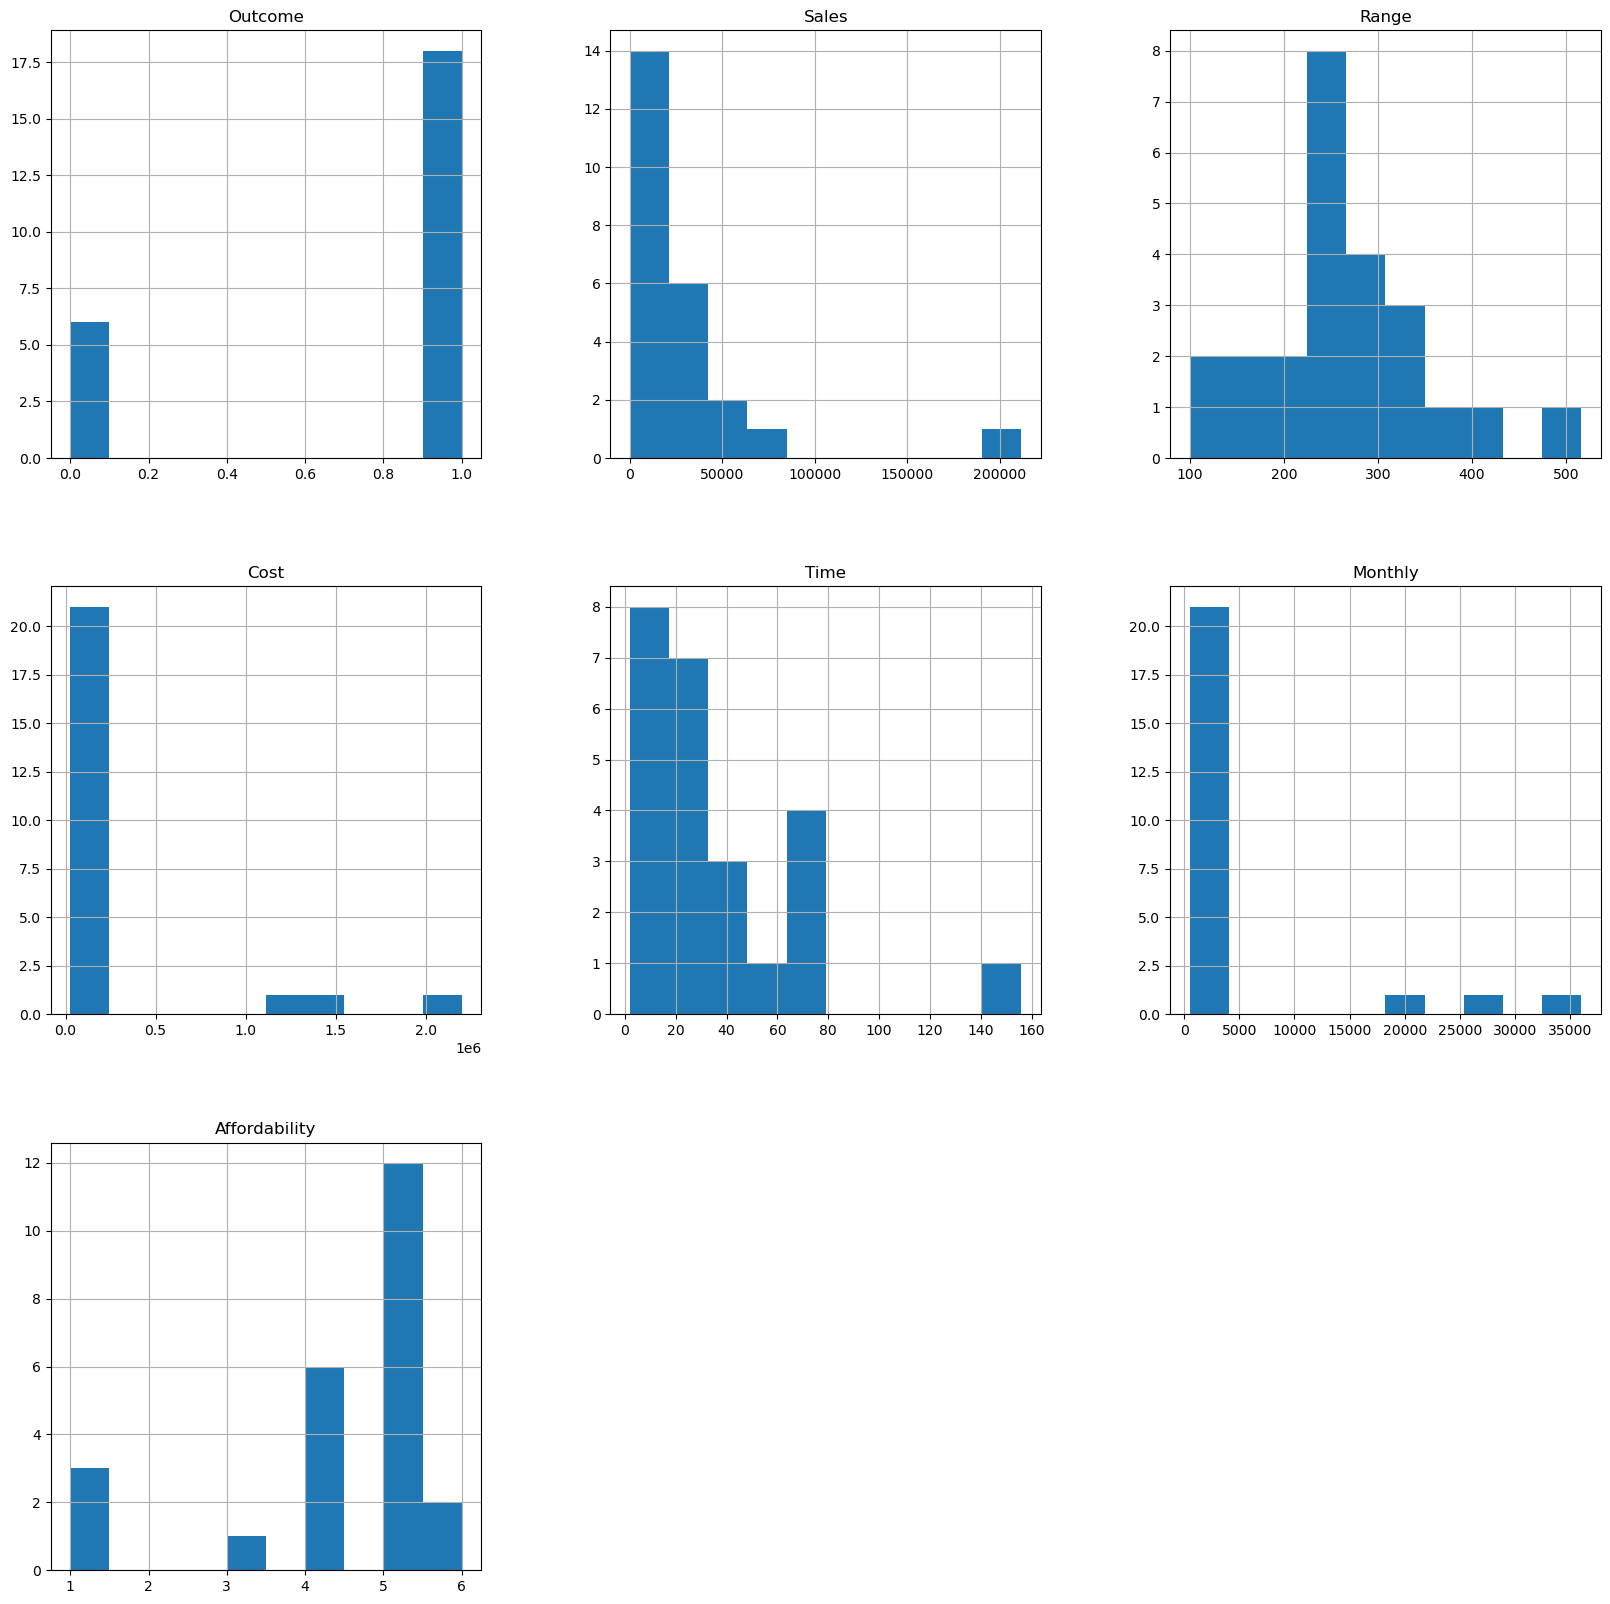

In [4]:
df.hist(figsize = (20,20))

In [5]:
df.drop('model', axis = 1, inplace=True)
print(df.head())

   Outcome   Sales  Range   Cost  Time  Monthly  Affordability
0        1  211641    272  43490     6      627              5
1        0   20332    230  75000    10     1287              4
2        0   34000    410  87400    20     1485              4
3        1   51500    270  48400     2      700              5
4        1   80000    310  48400    20      827              5


C:\Users\Bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bruno\anacond

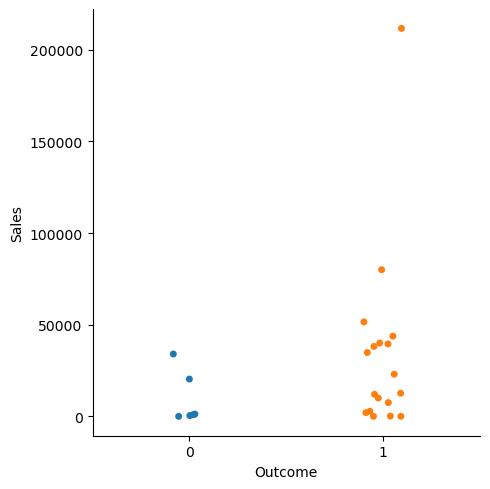

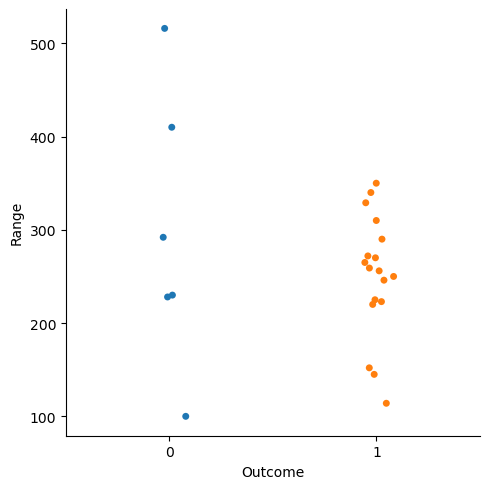

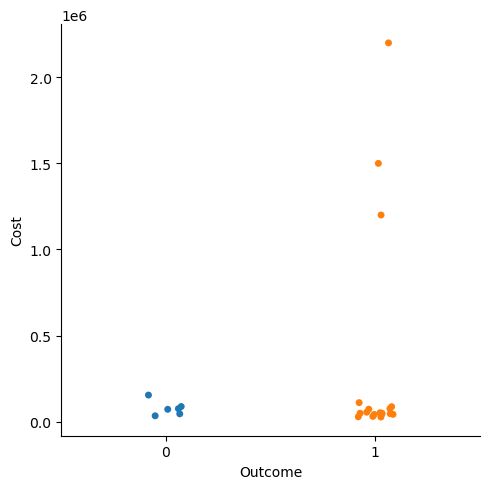

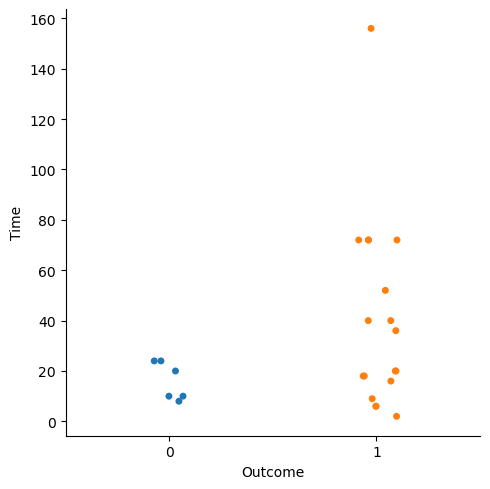

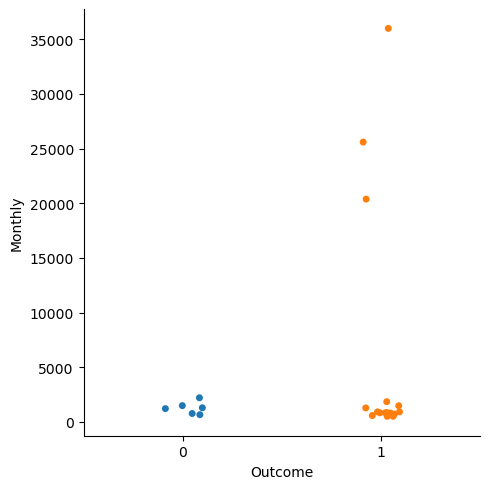

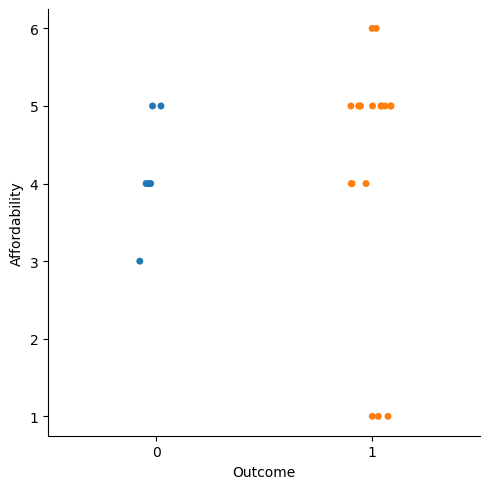

In [6]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

In [7]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
X_train.shape, X_test.shape
clf = RandomForestClassifier(n_estimators = 100, random_state=0)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Time             0.261446
Range            0.241838
Cost             0.160771
Monthly          0.145160
Sales            0.121545
Affordability    0.069239
dtype: float64

([<matplotlib.patches.Wedge at 0x268eb94e910>,
 [Text(0.749351091152843, 0.8052781768979237, ''),
  Text(-0.81296753153457, 0.7410018843907134, ''),
  Text(-0.9514619456990872, -0.552014642818927, ''),
  Text(-0.09226039052996998, -1.0961240898453322, ''),
  Text(0.7529414209465713, -0.801922201103672, ''),
  Text(1.0740789279470755, -0.2373909360950012, '')],
 [Text(0.4087369588106416, 0.43924264194432194, '26%'),
  Text(-0.4434368353824927, 0.4041828460312981, '24%'),
  Text(-0.518979243108593, -0.301098896083051, '16%'),
  Text(-0.05032384937998362, -0.5978858671883629, '15%'),
  Text(0.4106953205163116, -0.43741210969291194, '12%'),
  Text(0.5858612334256775, -0.12948596514272792, '7%')])

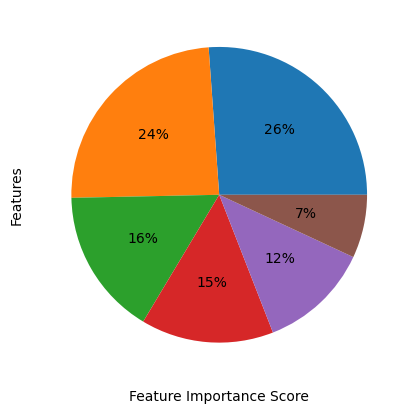

In [9]:
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.pie(feature_scores, autopct='%.0f%%')


In [10]:
y_pred = clf.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8333


In [11]:
X = df.drop(['Outcome', 'Affordability'], axis=1)

y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
X_train.shape, X_test.shape
clf = RandomForestClassifier(n_estimators = 100, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [12]:
y_pred = clf.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.5833
